## Singapore Rainfall data for the location (1.30◦N,103.68◦E), collected in year 2010 from ground-based sky imager.
Exploratory analysis - Initial Ploting and Data Parsing.

In [36]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import xarray as xr
import seaborn as sns # for density plots
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# from datetime import datetime
style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5) # For Increasing Size of graph

In [2]:
# Dataframe for IMAGER data
rainfall_df = pd.read_csv("data/imagerdata.csv", header=None, names=["day", "hour", "minute", "rainfall_rate"])
precip_dataset = xr.open_dataset('data/chirps-2010.nc') # open the dataset using xarray
# # Gauge Station Data
jan_gauge_df = pd.read_csv('data/gauge_data.csv', encoding= 'unicode_escape', header=0, usecols=[1,2,3,4], names=['year', 'month', 'day', 'rainfall'])

### Parsing the Gauge Station Data for JANUARY 2010

In [3]:
jan_gauge_df['date']=pd.to_datetime(jan_gauge_df['day'], unit='D', origin=pd.Timestamp('2009-12-31')) # Using day number to create the date

### Parsing the CHIRPS dataset for JANUARY 2010

In [4]:
# Dataframe for CHIRPS Dataset
precip_df = precip_dataset['precip'].sel(time=slice('2010-01-01T00:0','2010-01-31T00:0'), longitude=103.67499, latitude=1.324997).to_dataframe()

### Parsing the IMAGER dataset

In [5]:
# Parsing the Dates
rainfall_df['date']=pd.to_datetime(rainfall_df['day'], unit='D', origin=pd.Timestamp('2009-12-31')) # Using day number to create the date
rainfall_df['timestamp'] = rainfall_df['date'] + pd.to_timedelta(rainfall_df['hour'].astype('str') + ':' + rainfall_df['minute'].astype('str') + ':00') # append the timedelta in hours and minutes to get the full timestamp
rainfall_df.set_index('timestamp', inplace=True)

In [6]:
sampled_df = pd.DataFrame()
sampled_df = rainfall_df.groupby(pd.Grouper(freq="M")).resample('D').sum() # Groupby MONTH and then taking the total daily sum
sampled_df.drop(['day', 'hour', 'minute'], axis=1, inplace=True) # Dropped the day, hour, minute columns
sampled_df = sampled_df.reset_index(level=0, drop=True)
# display(sampled_df)

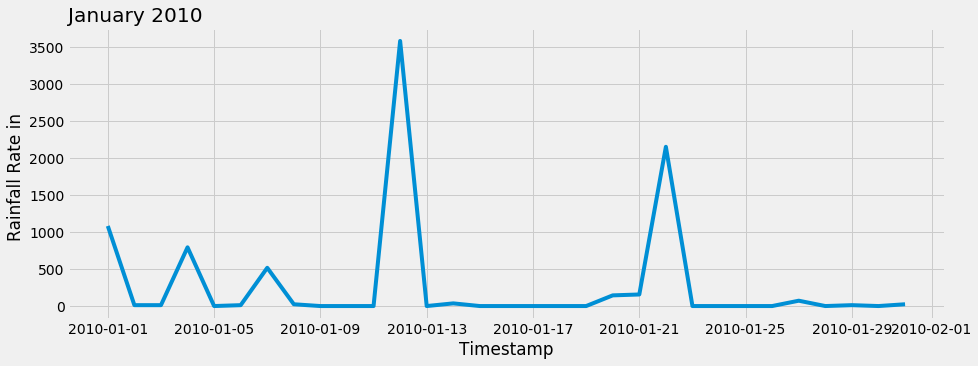

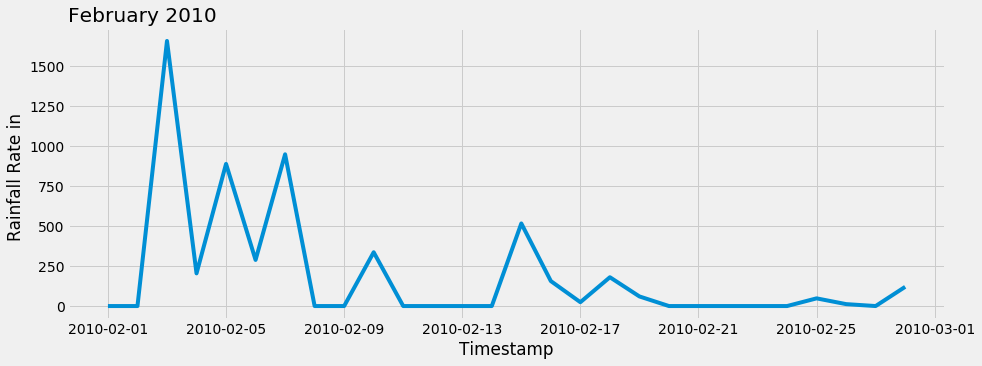

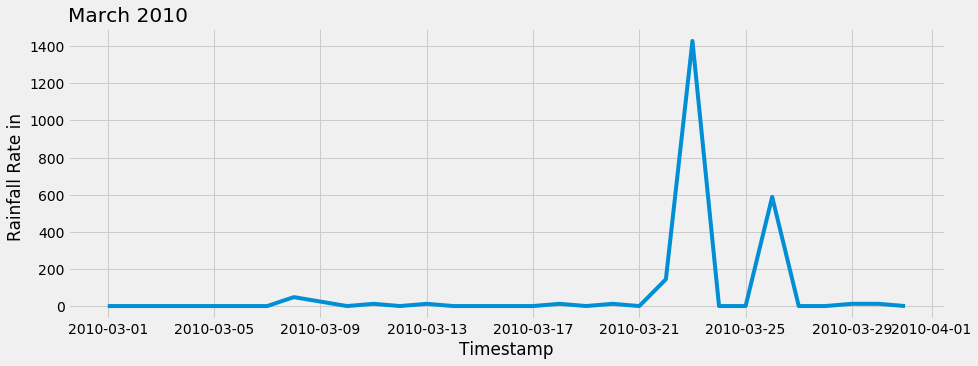

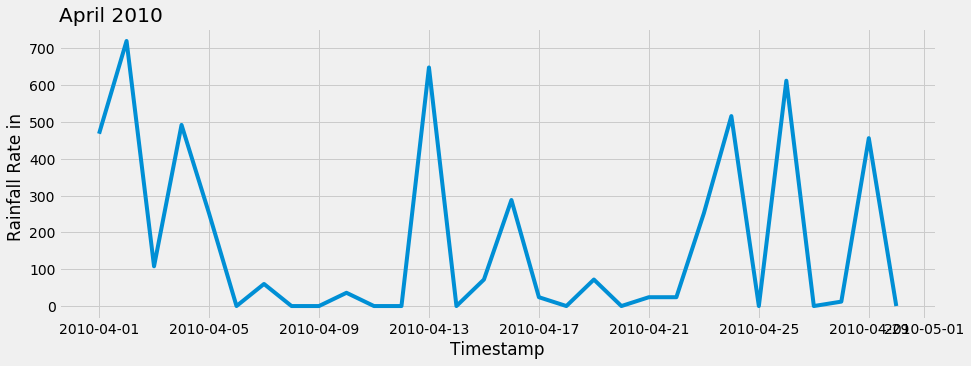

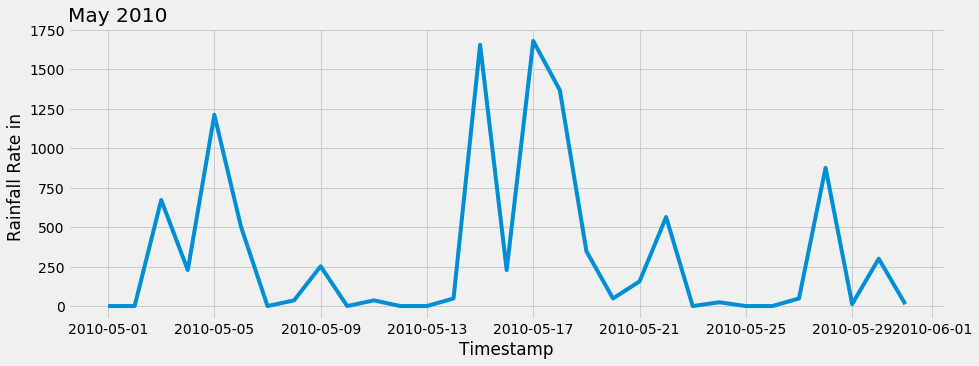

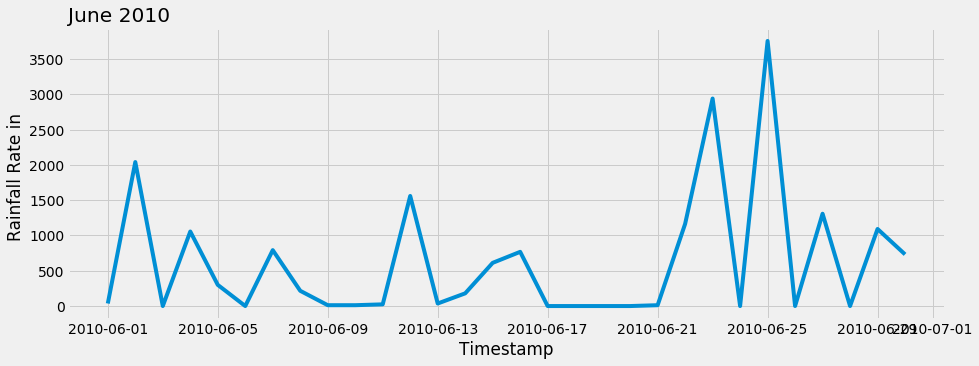

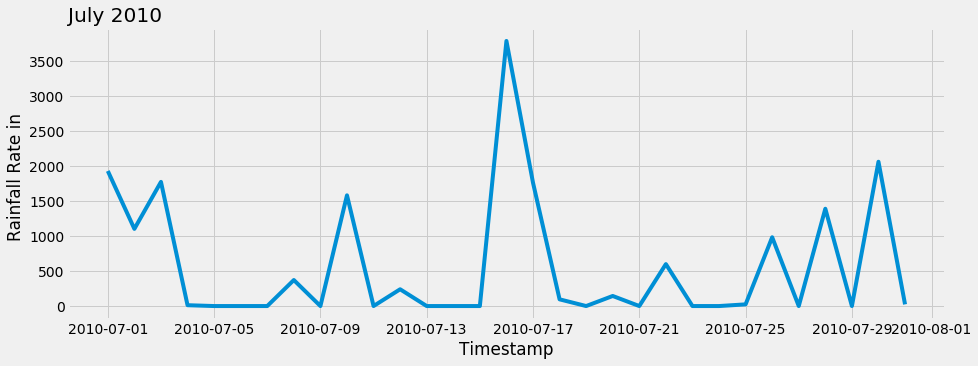

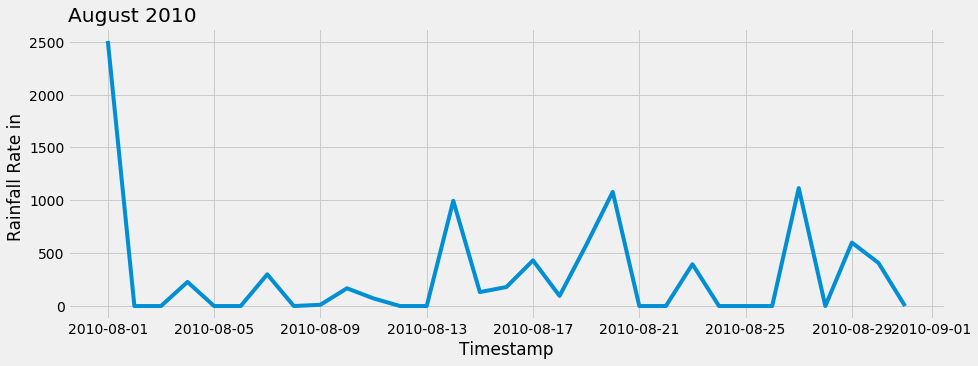

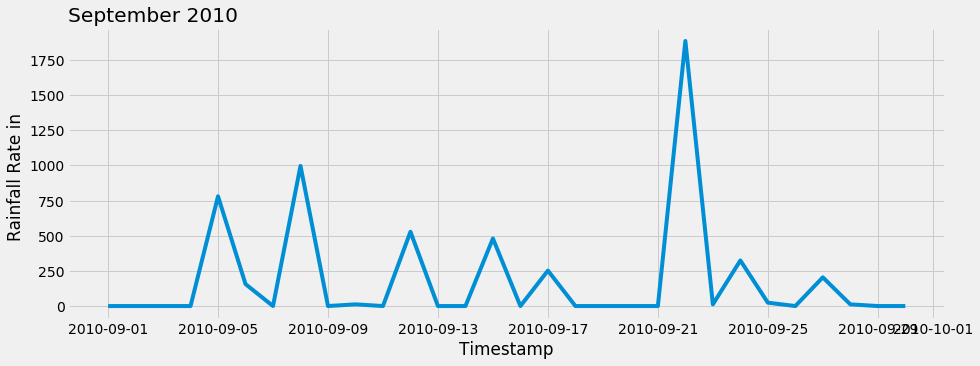

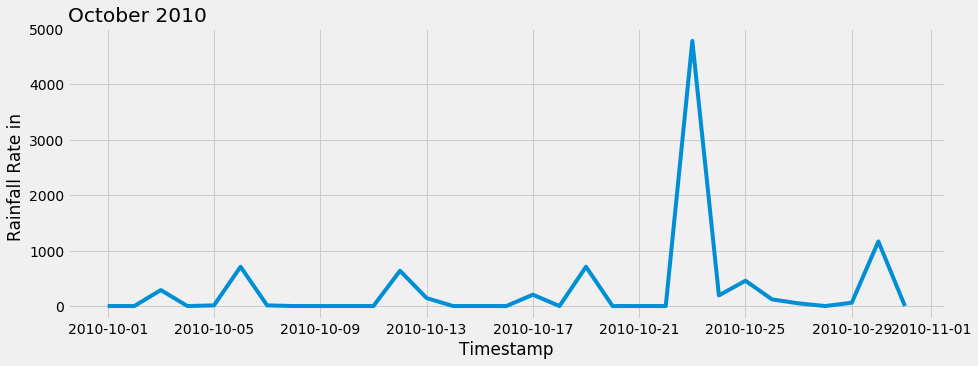

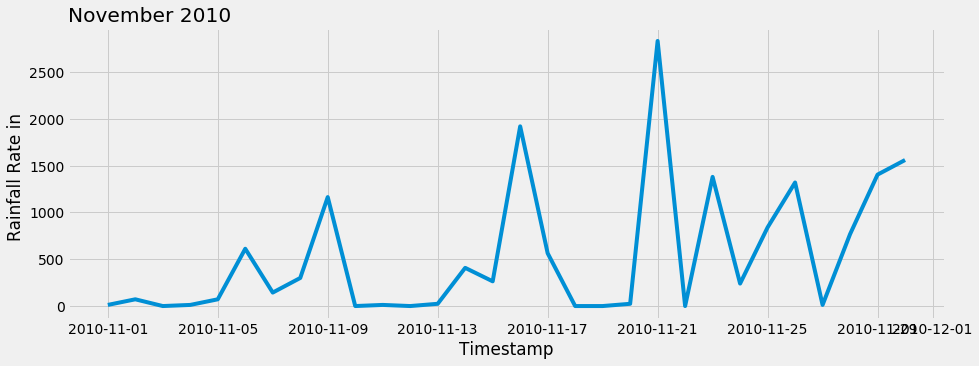

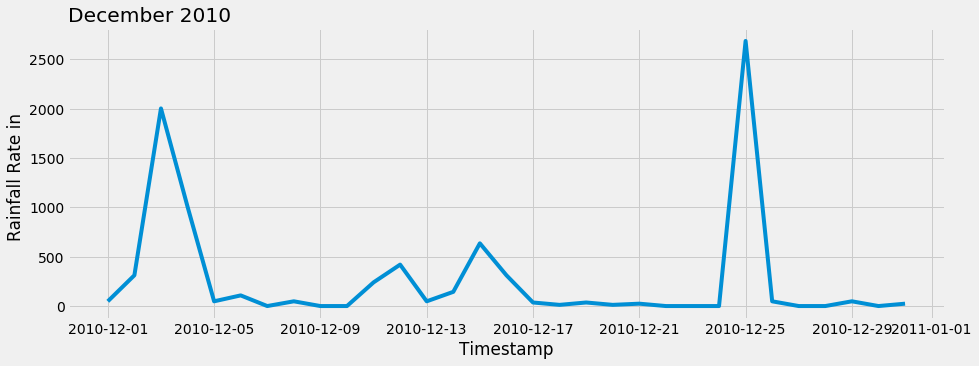

In [15]:
def plot_monthly_data():
    titles = ["January 2010", "February 2010", "March 2010", "April 2010", "May 2010", "June 2010", "July 2010", "August 2010", "September 2010", "October 2010", "November 2010", "December 2010"]
    for i in range(1, 13):
        plt.figure()
        plt.plot(sampled_df[sampled_df.index.month == i]['rainfall_rate'])
        plt.title(titles[i-1], loc='left')
        plt.xlabel('Timestamp')
        plt.ylabel('Rainfall Rate in ')
        # Show/save figure as desired.
        plt.show()
plot_monthly_data()

### Basic data analysis for the IMAGER data

In [8]:
daily_statistics_df = pd.DataFrame()
monthly_statistics_df = pd.DataFrame()
daily_statistics_df['daily_total_rate'] = rainfall_df.rainfall_rate.resample('D').sum()
daily_statistics_df['daily_mean_rate'] = rainfall_df.rainfall_rate.resample('D').mean()
monthly_statistics_df['monthly_total_rate'] = rainfall_df.rainfall_rate.resample('M').sum()
monthly_statistics_df['monthly_mean_rate'] = rainfall_df.rainfall_rate.resample('M').mean()

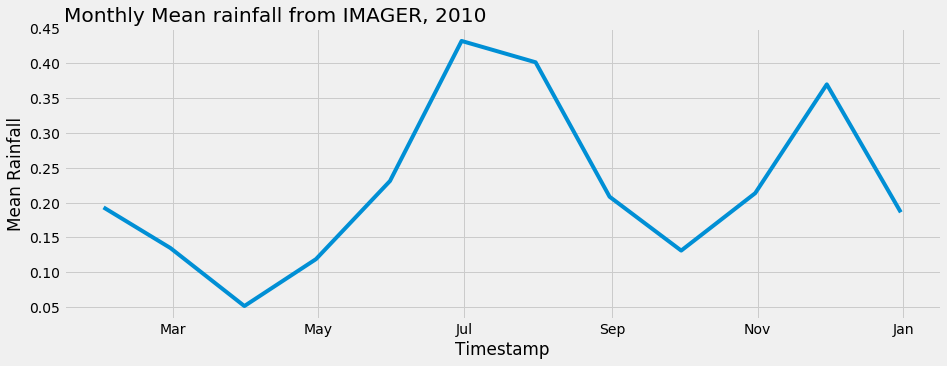

In [43]:
plt.plot(monthly_statistics_df['monthly_mean_rate'], )
plt.title("Monthly Mean rainfall from IMAGER, 2010", loc='left')
plt.xlabel('Timestamp')
plt.ylabel('Mean Rainfall')
ax = plt.gca()
locator = mdates.MonthLocator()
month_fmt = mdates.DateFormatter('%b')
# ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(month_fmt)

## January Rainfall Comparison with Gauge Station Data
Taken from - www.weather.gov.sg/climate-historical-daily/

Text(0, 0.5, 'Rainfall Rate')

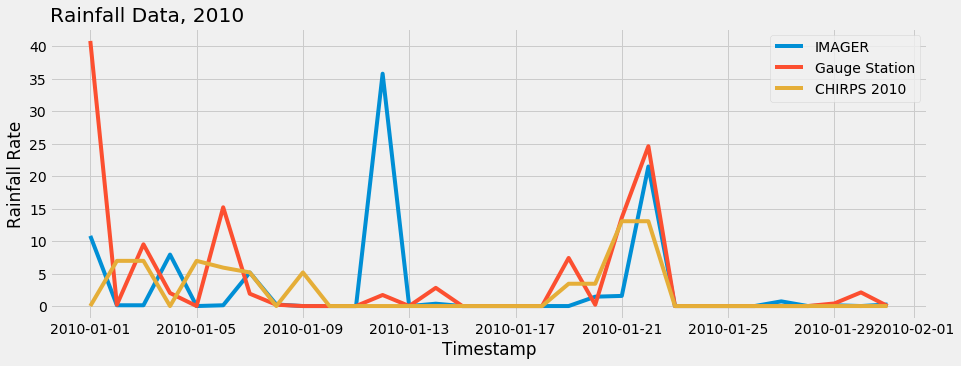

In [42]:
plt.plot(sampled_df[sampled_df.index.month == 1]['rainfall_rate']/100, label='IMAGER')
plt.plot(jan_gauge_df['date'], jan_gauge_df['rainfall'], label='Gauge Station')
plt.plot(precip_df['precip'], label='CHIRPS 2010')
plt.title('Rainfall Data, 2010', loc='left')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Rainfall Rate')

In [11]:
pearson_coeff = sampled_df[sampled_df.index.month == 1]['rainfall_rate'].corr(jan_gauge_df['rainfall'])

/Users/dhirajsaharia/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


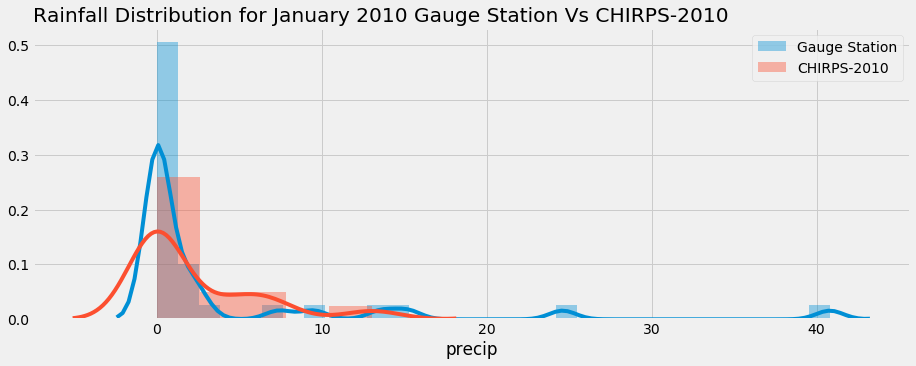

In [17]:
sns.distplot(jan_gauge_df['rainfall'], hist=True, kde=True, label='Gauge Station')
sns.distplot(precip_df['precip'], hist=True, kde=True, label='CHIRPS-2010')
# sns.distplot(sampled_df[sampled_df.index.month == 1]['rainfall_rate'], label='IMAGER')
plt.title('Rainfall Distribution for January 2010 Gauge Station Vs CHIRPS-2010', loc='left')
plt.legend()

## Monsoon Season Analysis -
According to [this](https://www.guidemesingapore.com/business-guides/immigration/get-to-know-singapore/weather-and-climate-in-singapore),
There is no clear-cut wet or dry season and rain is experienced every single month, usually in the afternoons and early evenings. However, there are two main monsoon seasons in Singapore: **Northeast Monsoon Season (December-March) and the Southwest Monsoon Season (June-September)**.

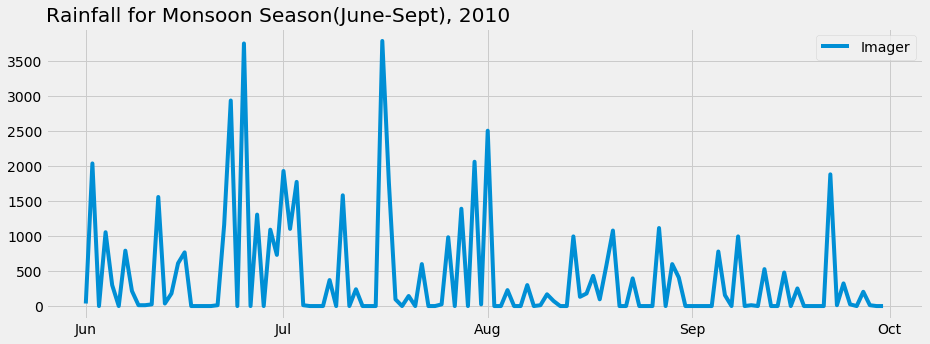

In [38]:
plt.plot(sampled_df[(sampled_df.index.month >= 6) & (sampled_df.index.month <= 9)]['rainfall_rate'], label='Imager')
plt.title('Rainfall for Monsoon Season(June-Sept), 2010', loc='left')
ax = plt.gca()
locator = mdates.MonthLocator()
month_fmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(month_fmt)
plt.legend();